# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [60]:
import pandas as pd
import joblib
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [61]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [62]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [64]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

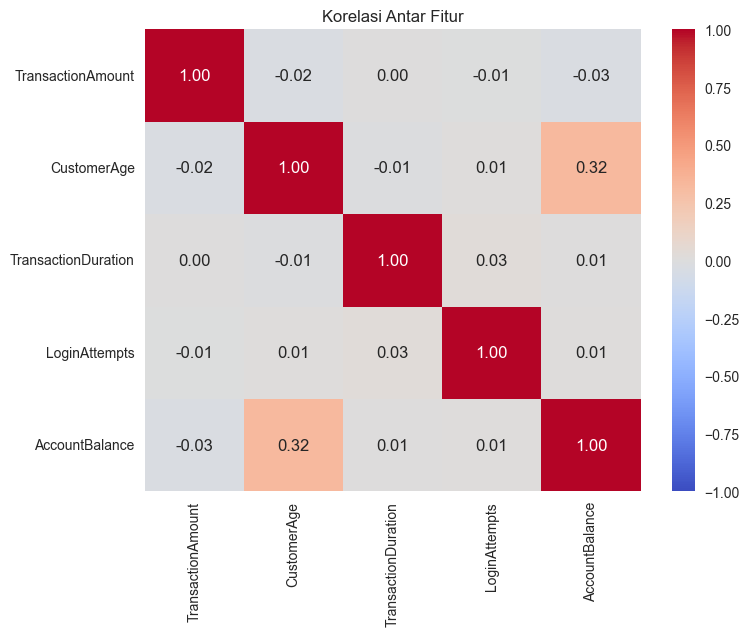

In [65]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

df_numeric = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Korelasi Antar Fitur')
plt.show()

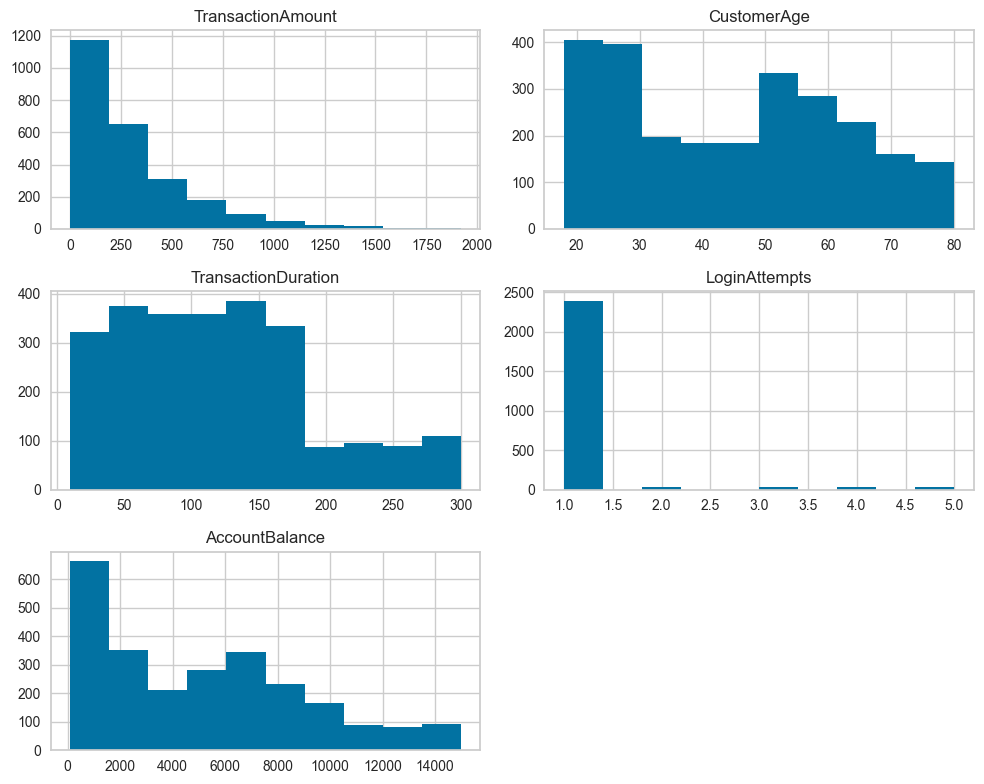

In [66]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

df_numeric = df.select_dtypes(include=['float64', 'int64'])

df_numeric.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

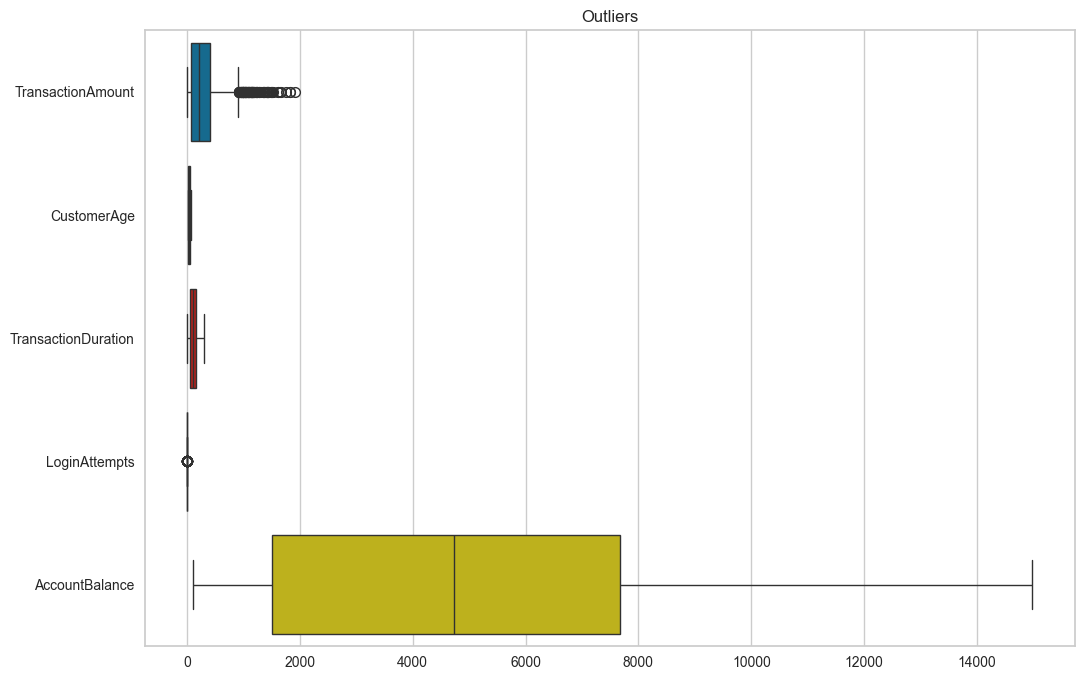

In [67]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# Melihat Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_numeric, orient="h")
plt.title("Outliers")
plt.show()

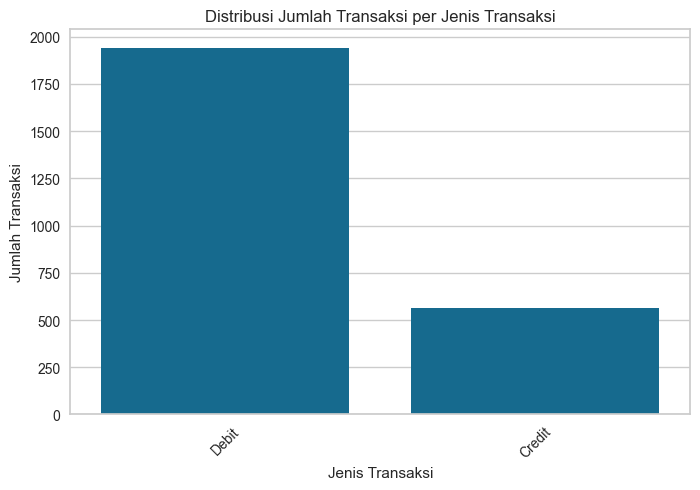

In [68]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='TransactionType', order=df['TransactionType'].value_counts().index)
plt.title('Distribusi Jumlah Transaksi per Jenis Transaksi')
plt.xlabel('Jenis Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

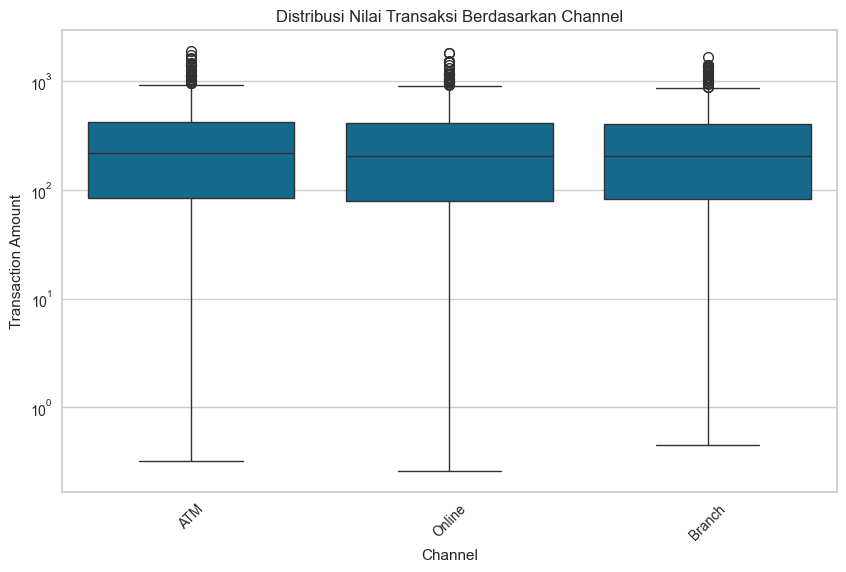

In [69]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Channel', y='TransactionAmount')
plt.title('Distribusi Nilai Transaksi Berdasarkan Channel')
plt.xlabel('Channel')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

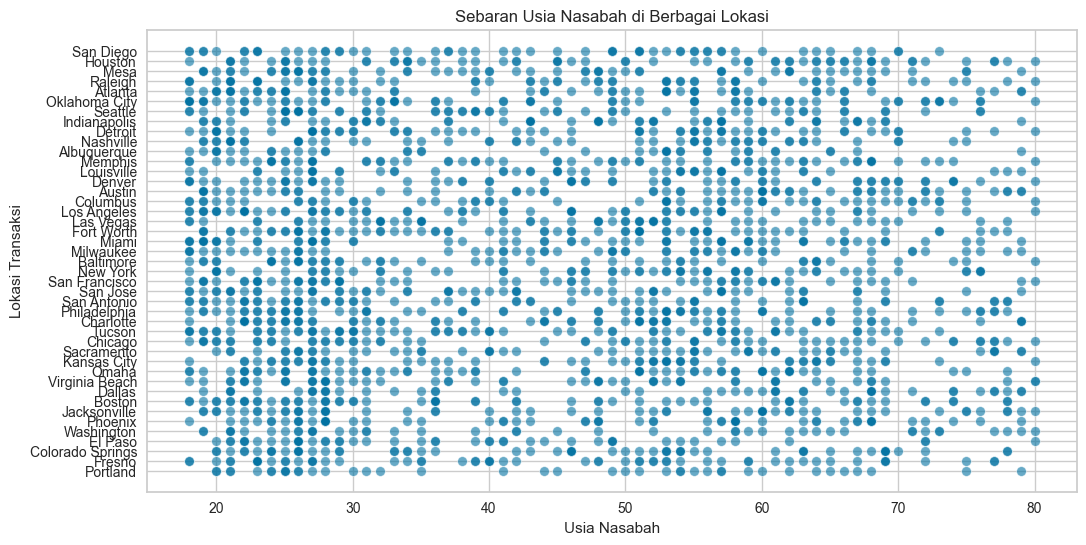

In [70]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='CustomerAge', y='Location', alpha=0.6)
plt.title('Sebaran Usia Nasabah di Berbagai Lokasi')
plt.xlabel('Usia Nasabah')
plt.ylabel('Lokasi Transaksi')
plt.show()

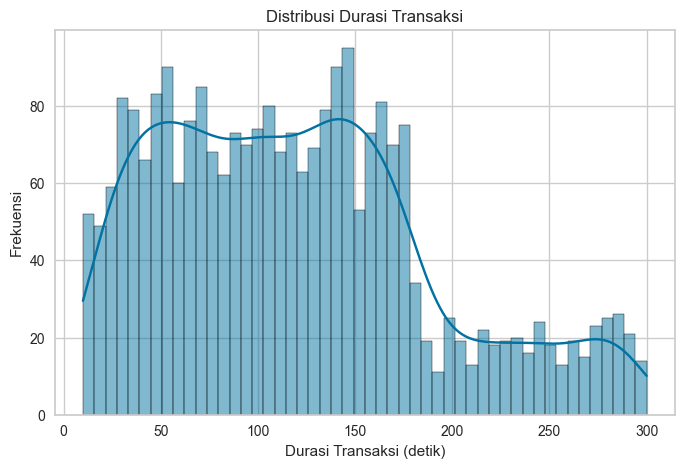

In [71]:
plt.figure(figsize=(8,5))
sns.histplot(df['TransactionDuration'], bins=50, kde=True)
plt.title('Distribusi Durasi Transaksi')
plt.xlabel('Durasi Transaksi (detik)')
plt.ylabel('Frekuensi')
plt.show()

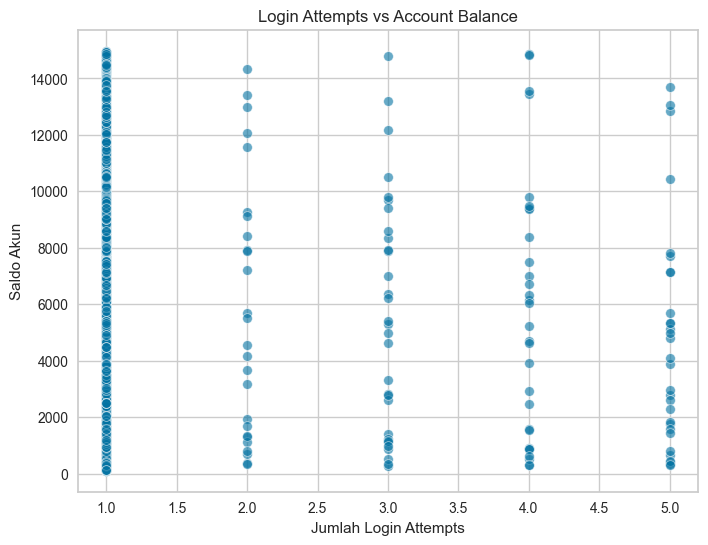

In [72]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='LoginAttempts', y='AccountBalance', alpha=0.6)
plt.title('Login Attempts vs Account Balance')
plt.xlabel('Jumlah Login Attempts')
plt.ylabel('Saldo Akun')
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [73]:
# Mengecek dataset menggunakan isnull().sum()

df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [74]:
# Mengecek dataset menggunakan duplicated().sum()

df.duplicated().sum()

21

In [75]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.

min_max_scaler = MinMaxScaler()

df_scaled_array = min_max_scaler.fit_transform(df_numeric)

df_scaled = pd.DataFrame(df_scaled_array, columns=df_numeric.columns)

df_non_numeric = df.drop(columns=df_numeric.columns)
df_final = pd.concat([df_non_numeric.reset_index(drop=True), df_scaled], axis=1)

print(df_final.head())

  TransactionID AccountID      TransactionDate TransactionType   Location  \
0      TX000001   AC00128  2023-04-11 16:29:14           Debit  San Diego   
1      TX000002   AC00455  2023-06-27 16:44:19           Debit    Houston   
2      TX000003   AC00019  2023-07-10 18:16:08           Debit       Mesa   
3      TX000004   AC00070  2023-05-05 16:32:11           Debit    Raleigh   
4      TX000005   AC00411  2023-10-16 17:51:24          Credit    Atlanta   

  DeviceID      IP Address MerchantID Channel CustomerOccupation  \
0  D000380  162.198.218.92       M015     ATM             Doctor   
1  D000051     13.149.61.4       M052     ATM             Doctor   
2  D000235  215.97.143.157       M009  Online            Student   
3  D000187  200.13.225.150       M002  Online            Student   
4  D000308    65.164.3.100       M091  Online            Student   

  PreviousTransactionDate  TransactionAmount  CustomerAge  \
0     2024-11-04 08:08:08           0.007207     0.838710   
1     

In [76]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

df_cleaned = df_final.drop(columns=[col for col in df.columns if 'id' in col.lower() or 'ip address' in col.lower()])

print(df_cleaned.columns)

Index(['TransactionDate', 'TransactionType', 'Location', 'Channel',
       'CustomerOccupation', 'PreviousTransactionDate', 'TransactionAmount',
       'CustomerAge', 'TransactionDuration', 'LoginAttempts',
       'AccountBalance'],
      dtype='object')


In [77]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.

df_encoded = pd.get_dummies(df_cleaned, columns=['TransactionType', 'Location', 'Channel', 'CustomerOccupation'])

print(df_encoded.head())


       TransactionDate PreviousTransactionDate  TransactionAmount  \
0  2023-04-11 16:29:14     2024-11-04 08:08:08           0.007207   
1  2023-06-27 16:44:19     2024-11-04 08:09:35           0.195940   
2  2023-07-10 18:16:08     2024-11-04 08:07:04           0.065680   
3  2023-05-05 16:32:11     2024-11-04 08:09:06           0.096016   
4  2023-10-16 17:51:24     2024-11-04 08:06:39           0.006874   

   CustomerAge  TransactionDuration  LoginAttempts  AccountBalance  \
0     0.838710             0.244828            0.0        0.336832   
1     0.806452             0.451724            0.0        0.918055   
2     0.016129             0.158621            0.0        0.068637   
3     0.129032             0.051724            0.0        0.569198   
4          NaN             0.648276            0.0        0.492591   

   TransactionType_Credit  TransactionType_Debit  Location_Albuquerque  ...  \
0                   False                   True                 False  ...   
1     

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [78]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

df_clean = df_encoded.dropna()
print(df_clean.isnull().sum())

TransactionDate                0
PreviousTransactionDate        0
TransactionAmount              0
CustomerAge                    0
TransactionDuration            0
LoginAttempts                  0
AccountBalance                 0
TransactionType_Credit         0
TransactionType_Debit          0
Location_Albuquerque           0
Location_Atlanta               0
Location_Austin                0
Location_Baltimore             0
Location_Boston                0
Location_Charlotte             0
Location_Chicago               0
Location_Colorado Springs      0
Location_Columbus              0
Location_Dallas                0
Location_Denver                0
Location_Detroit               0
Location_El Paso               0
Location_Fort Worth            0
Location_Fresno                0
Location_Houston               0
Location_Indianapolis          0
Location_Jacksonville          0
Location_Kansas City           0
Location_Las Vegas             0
Location_Los Angeles           0
Location_L

In [79]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_cleaned = df_clean.drop_duplicates()

duplicates = df_cleaned[df_cleaned.duplicated()]
print(duplicates)

df_cleaned.head()

Empty DataFrame
Columns: [TransactionDate, PreviousTransactionDate, TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, AccountBalance, TransactionType_Credit, TransactionType_Debit, Location_Albuquerque, Location_Atlanta, Location_Austin, Location_Baltimore, Location_Boston, Location_Charlotte, Location_Chicago, Location_Colorado Springs, Location_Columbus, Location_Dallas, Location_Denver, Location_Detroit, Location_El Paso, Location_Fort Worth, Location_Fresno, Location_Houston, Location_Indianapolis, Location_Jacksonville, Location_Kansas City, Location_Las Vegas, Location_Los Angeles, Location_Louisville, Location_Memphis, Location_Mesa, Location_Miami, Location_Milwaukee, Location_Nashville, Location_New York, Location_Oklahoma City, Location_Omaha, Location_Philadelphia, Location_Phoenix, Location_Portland, Location_Raleigh, Location_Sacramento, Location_San Antonio, Location_San Diego, Location_San Francisco, Location_San Jose, Location_Seattle, Location_Tucson,

,TransactionDate,PreviousTransactionDate,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Location_Albuquerque,...,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,2023-04-11 16:29:14,2024-11-04 08:08:08,0.007207,0.838710,0.244828,0.0,0.336832,False,True,False,...,False,False,False,True,False,False,True,False,False,False
1,2023-06-27 16:44:19,2024-11-04 08:09:35,0.195940,0.806452,0.451724,0.0,0.918055,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,2023-07-10 18:16:08,2024-11-04 08:07:04,0.065680,0.016129,0.158621,0.0,0.068637,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3,2023-05-05 16:32:11,2024-11-04 08:09:06,0.096016,0.129032,0.051724,0.0,0.569198,False,True,False,...,False,False,False,False,False,True,False,False,False,True
5,2023-04-03 17:15:01,2024-11-04 08:06:36,0.047888,0.000000,0.558621,0.0,0.045738,False,True,False,...,False,False,False,True,False,False,False,False,False,True


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [80]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut

Q1 = df_cleaned['TransactionAmount'].quantile(0.25)
Q3 = df_cleaned['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_cleaned[(df_cleaned['TransactionAmount'] < Q1 - 1.5*IQR) | 
                      (df_cleaned['TransactionAmount'] > Q3 + 1.5*IQR)]
print(f"Jumlah outlier: {len(outliers)} dari {len(df_cleaned)} baris")

df_no_outliers = df_cleaned[~((df_cleaned['TransactionAmount'] < Q1 - 1.5*IQR) | 
                              (df_cleaned['TransactionAmount'] > Q3 + 1.5*IQR))]

Q1 = df_no_outliers['TransactionAmount'].quantile(0.25)
Q3 = df_no_outliers['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_no_outliers[(df_no_outliers['TransactionAmount'] < Q1 - 1.5*IQR) | 
                          (df_no_outliers['TransactionAmount'] > Q3 + 1.5*IQR)]
print(f"Jumlah outlier: {len(outliers)} dari {len(df_no_outliers)} baris")


Jumlah outlier: 104 dari 2348 baris
Jumlah outlier: 47 dari 2244 baris


In [81]:
df_no_outliers.head()

,TransactionDate,PreviousTransactionDate,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Location_Albuquerque,...,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,2023-04-11 16:29:14,2024-11-04 08:08:08,0.007207,0.838710,0.244828,0.0,0.336832,False,True,False,...,False,False,False,True,False,False,True,False,False,False
1,2023-06-27 16:44:19,2024-11-04 08:09:35,0.195940,0.806452,0.451724,0.0,0.918055,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,2023-07-10 18:16:08,2024-11-04 08:07:04,0.065680,0.016129,0.158621,0.0,0.068637,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3,2023-05-05 16:32:11,2024-11-04 08:09:06,0.096016,0.129032,0.051724,0.0,0.569198,False,True,False,...,False,False,False,False,False,True,False,False,False,True
5,2023-04-03 17:15:01,2024-11-04 08:06:36,0.047888,0.000000,0.558621,0.0,0.045738,False,True,False,...,False,False,False,True,False,False,False,False,False,True


Statistik deskriptif dari data:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2348.000000  2348.000000          2348.000000    2348.000000   
mean            0.154444     0.430476             0.378091       0.030239   
std             0.152255     0.287711             0.243118       0.147198   
min             0.000000     0.000000             0.000000       0.000000   
25%             0.042249     0.145161             0.182759       0.000000   
50%             0.109899     0.435484             0.351724       0.000000   
75%             0.214105     0.661290             0.524138       0.000000   
max             1.000000     1.000000             1.000000       1.000000   

       AccountBalance  
count     2348.000000  
mean         0.336489  
std          0.262597  
min          0.000000  
25%          0.093553  
50%          0.309532  
75%          0.510548  
max          1.000000  


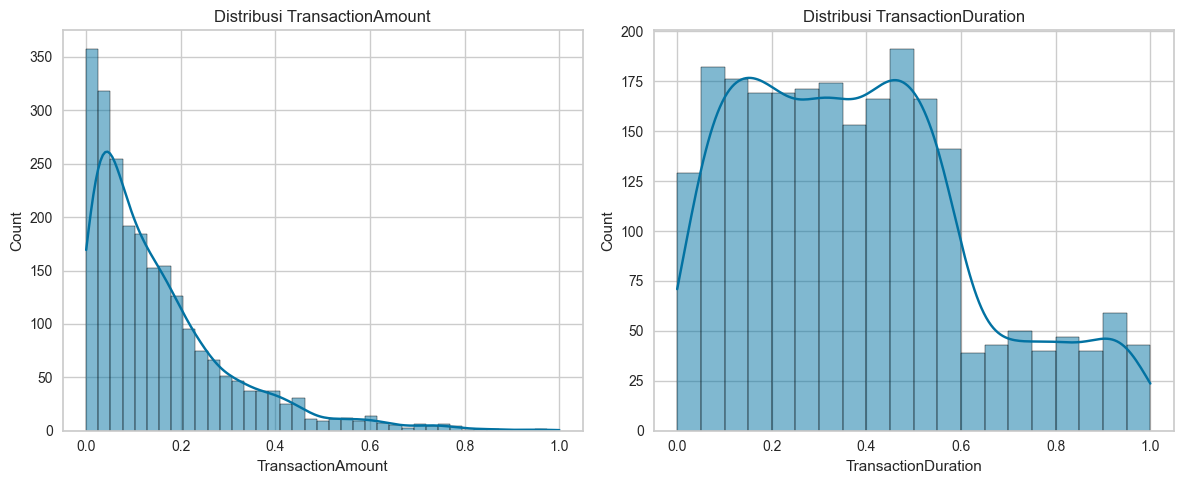

In [82]:
print("Statistik deskriptif dari data:")
print(df_cleaned.describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['TransactionAmount'], kde=True)
plt.title('Distribusi TransactionAmount')
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['TransactionDuration'], kde=True)
plt.title('Distribusi TransactionDuration')

plt.tight_layout()
plt.show()

In [83]:
def remove_outliers_iqr(df_cleaned, column, threshold=1.5):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    print(f"Batas untuk {column}:")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Jumlah outlier di {column}: {len(outliers)}")
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_no_outliers = remove_outliers_iqr(df, 'TransactionAmount')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'TransactionDuration')

print(f"Jumlah data setelah penghapusan outlier: {len(df_no_outliers)}")



Batas untuk TransactionAmount:
Lower bound: -416.3825
Upper bound: 910.7975
Jumlah outlier di TransactionAmount: 113
Batas untuk TransactionDuration:
Lower bound: -85.5
Upper bound: 310.5
Jumlah outlier di TransactionDuration: 0
Jumlah data setelah penghapusan outlier: 2511


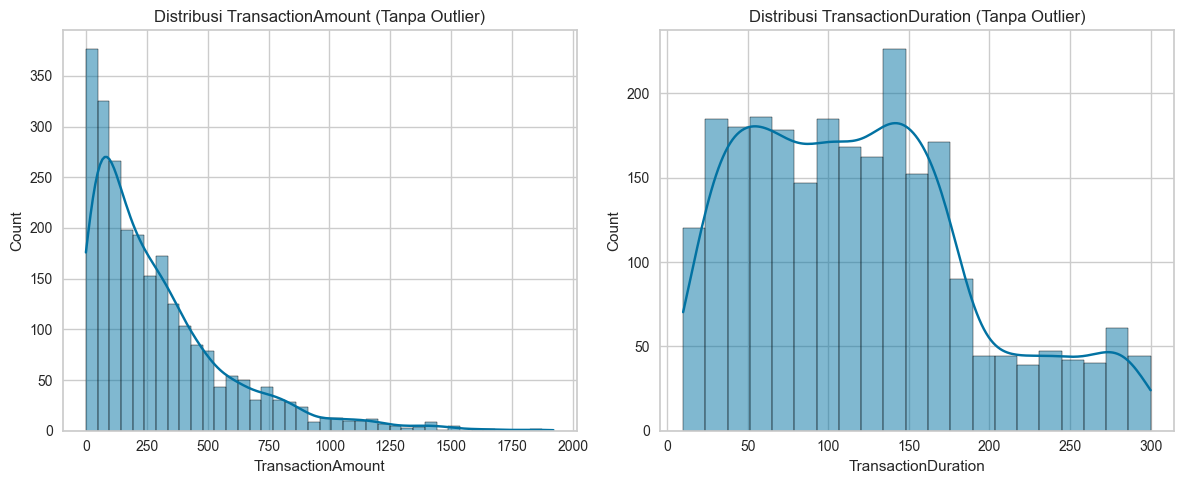

In [84]:
# Visualisasi distribusi data setelah penanganan outlier
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_no_outliers['TransactionAmount'], kde=True)
plt.title('Distribusi TransactionAmount (Tanpa Outlier)')
plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['TransactionDuration'], kde=True)
plt.title('Distribusi TransactionDuration (Tanpa Outlier)')
plt.tight_layout()
plt.show()


Hasil Binning:
   TransactionAmount TransactionAmount_Binned  TransactionDuration  \
0              14.09                    Kecil                 81.0   
1             376.24                    Besar                141.0   
2             126.29                   Sedang                 56.0   
3             184.50                   Sedang                 25.0   
4              13.45                    Kecil                198.0   
5              92.15                   Sedang                172.0   
6               7.08                    Kecil                139.0   
7             171.42                   Sedang                291.0   
8             106.23                   Sedang                 86.0   
9             815.96                    Besar                120.0   

  TransactionDuration_Binned  
0                     Sedang  
1                     Sedang  
2                     Sedang  
3                     Pendek  
4                    Panjang  
5                    Panjan

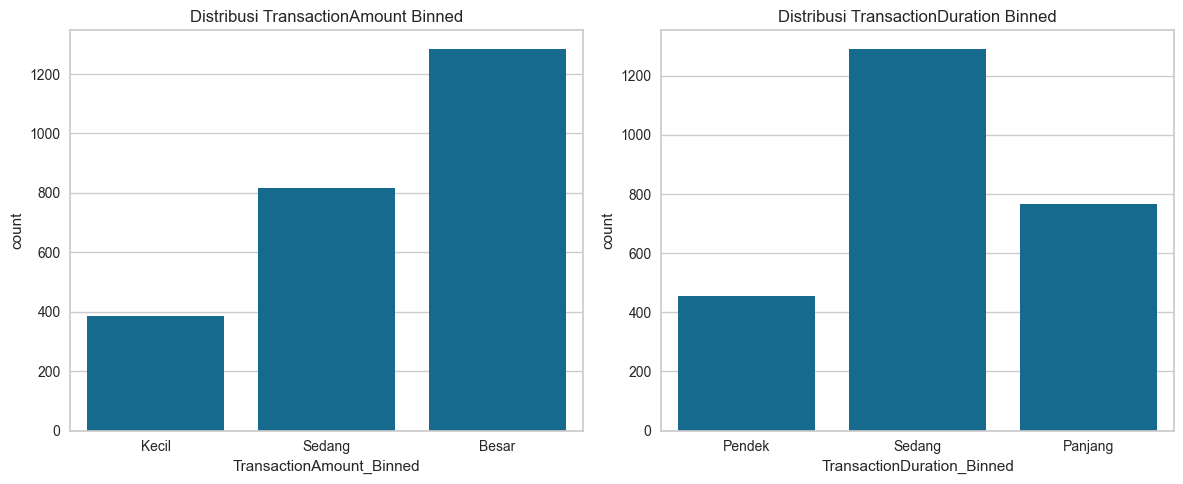

In [85]:
df_no_outliers = df_no_outliers.copy()

bins_amount = [0, 50, 200, float('inf')]
labels_amount = ['Kecil', 'Sedang', 'Besar']
df_no_outliers.loc[:, 'TransactionAmount_Binned'] = pd.cut(df_no_outliers['TransactionAmount'], 
                                                           bins=bins_amount, 
                                                           labels=labels_amount, 
                                                           right=False)

bins_duration = [0, 50, 150, float('inf')]
labels_duration = ['Pendek', 'Sedang', 'Panjang']
df_no_outliers.loc[:, 'TransactionDuration_Binned'] = pd.cut(df_no_outliers['TransactionDuration'], 
                                                              bins=bins_duration, 
                                                              labels=labels_duration, 
                                                              right=False)

print("\nHasil Binning:")
print(df_no_outliers[['TransactionAmount', 'TransactionAmount_Binned', 
                     'TransactionDuration', 'TransactionDuration_Binned']].head(10))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='TransactionAmount_Binned', data=df_no_outliers)
plt.title('Distribusi TransactionAmount Binned')
plt.subplot(1, 2, 2)
sns.countplot(x='TransactionDuration_Binned', data=df_no_outliers)
plt.title('Distribusi TransactionDuration Binned')
plt.tight_layout()
plt.show()


In [86]:
# Encoding menggunakan LabelEncoder

le_amount = LabelEncoder()
df_no_outliers.loc[:, 'TransactionAmount_Binned_Encoded'] = le_amount.fit_transform(df_no_outliers['TransactionAmount_Binned'])
print("\nMapping TransactionAmount_Binned:")
for i, label in enumerate(le_amount.classes_):
    print(f"{label}: {i}")

le_duration = LabelEncoder()
df_no_outliers.loc[:, 'TransactionDuration_Binned_Encoded'] = le_duration.fit_transform(df_no_outliers['TransactionDuration_Binned'])
print("\nMapping TransactionDuration_Binned:")
for i, label in enumerate(le_duration.classes_):
    print(f"{label}: {i}")

print("\nHasil Encoding dengan LabelEncoder:")
print(df_no_outliers[['TransactionAmount_Binned', 'TransactionAmount_Binned_Encoded', 
                     'TransactionDuration_Binned', 'TransactionDuration_Binned_Encoded']].head(10))


Mapping TransactionAmount_Binned:
Besar: 0
Kecil: 1
Sedang: 2
nan: 3

Mapping TransactionDuration_Binned:
Panjang: 0
Pendek: 1
Sedang: 2

Hasil Encoding dengan LabelEncoder:
  TransactionAmount_Binned  TransactionAmount_Binned_Encoded  \
0                    Kecil                                 1   
1                    Besar                                 0   
2                   Sedang                                 2   
3                   Sedang                                 2   
4                    Kecil                                 1   
5                   Sedang                                 2   
6                    Kecil                                 1   
7                   Sedang                                 2   
8                   Sedang                                 2   
9                    Besar                                 0   

  TransactionDuration_Binned  TransactionDuration_Binned_Encoded  
0                     Sedang                         

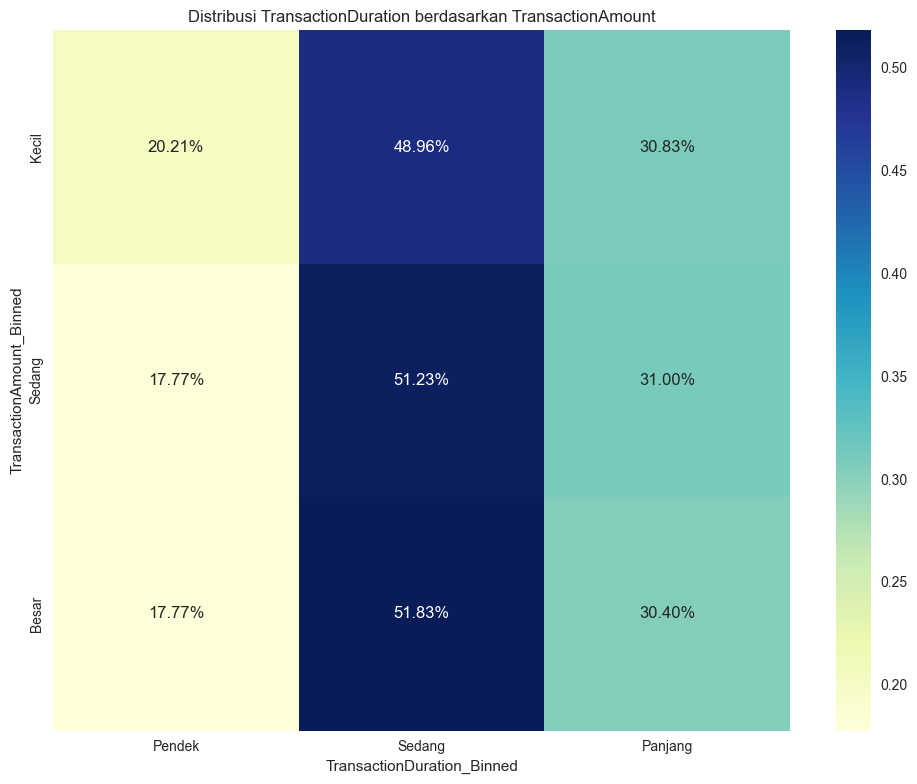

In [87]:
# Distribusi data setelah binning dan korelasi antara kedua variabel
plt.figure(figsize=(10, 8))
crosstab = pd.crosstab(df_no_outliers['TransactionAmount_Binned'], 
                      df_no_outliers['TransactionDuration_Binned'], 
                      normalize='index')
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='.2%')
plt.title('Distribusi TransactionDuration berdasarkan TransactionAmount')
plt.tight_layout()
plt.show()

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [88]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df_no_outliers.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_Binned_Encoded,TransactionDuration_Binned_Encoded
count,2485.000000,2493.000000,2511.000000,2490.000000,2484.000000,2511.000000,2511.000000
mean,296.548897,44.683113,119.422939,1.122892,5106.406349,0.834727,1.208284
std,291.086675,17.864746,70.078513,0.597435,3902.460318,0.922151,0.880526
min,0.260000,18.000000,10.000000,1.000000,101.250000,0.000000,0.000000
25%,81.150000,27.000000,63.000000,1.000000,1498.895000,0.000000,0.000000
50%,211.180000,45.000000,112.000000,1.000000,4713.025000,0.000000,2.000000
75%,411.470000,59.000000,161.000000,1.000000,7659.622500,2.000000,2.000000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000,3.000000,2.000000


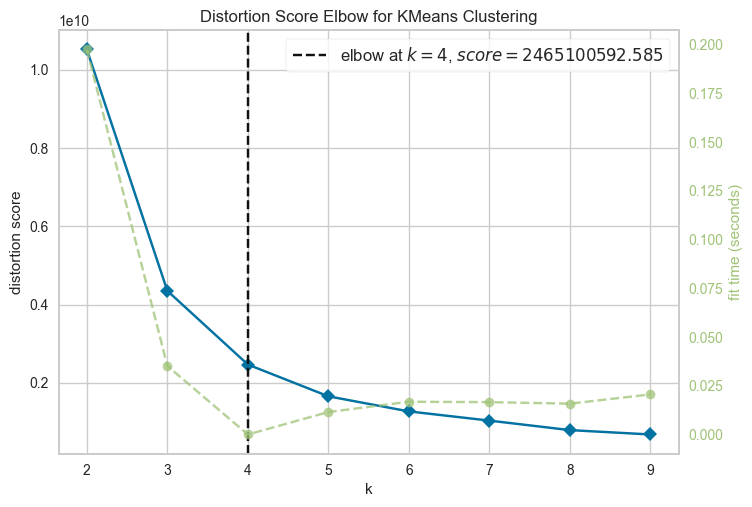

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

X = df_no_outliers.select_dtypes(include=['int64', 'float64']).dropna()

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)
visualizer.show()

cluster
1    1018
2     611
0     549
3     242
Name: count, dtype: int64


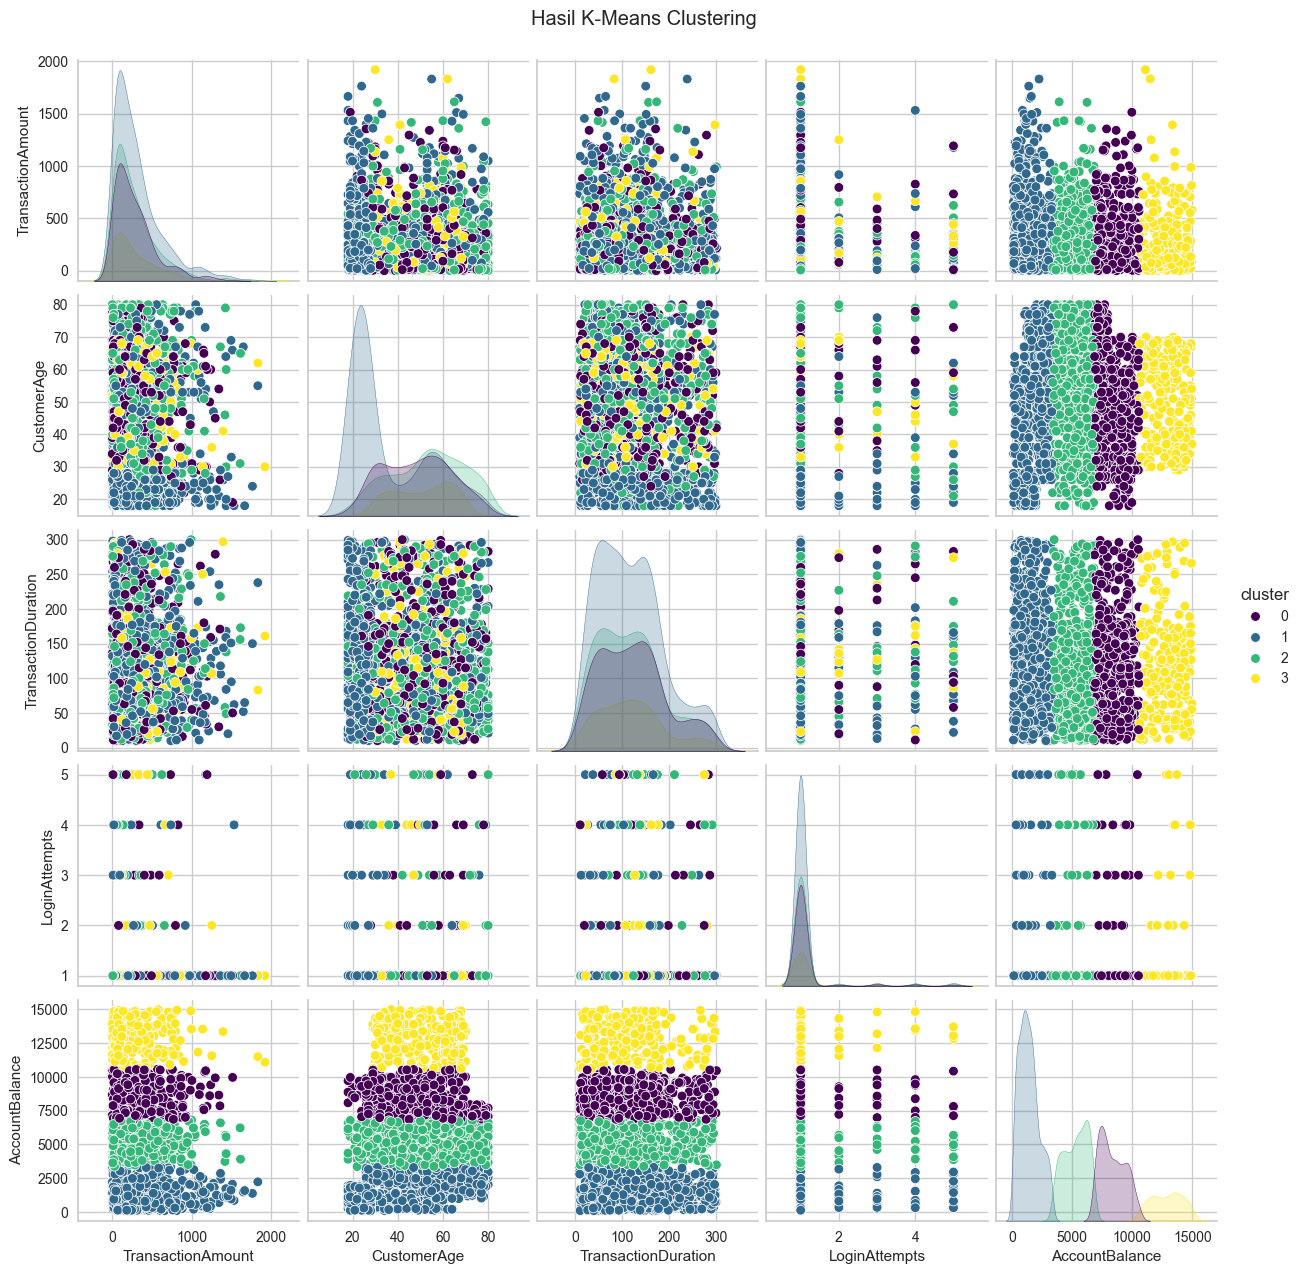

In [90]:
# Sinkronkan df_no_outliers dengan X
X = df_no_outliers.select_dtypes(include=['int64', 'float64'])
X = X.dropna()
df_cleanedd = df_no_outliers.loc[X.index]

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

df_cleanedd['cluster'] = kmeans.labels_
print(df_cleanedd['cluster'].value_counts())

max_features = 5
selected_features = X.columns[:max_features]

X_vis = X[selected_features].copy()
X_vis['cluster'] = kmeans.labels_

sns.pairplot(X_vis, hue='cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Hasil K-Means Clustering', y=1.02)
plt.show()


Jalankan cell code ini untuk menyimpan model kamu.

In [91]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [92]:
# Menghitung dan menampilkan nilai Silhouette Score.

labels = kmeans.labels_
score = silhouette_score(X, labels)

print(f"Silhouette Score: {score}")

Silhouette Score: 0.597042675792184


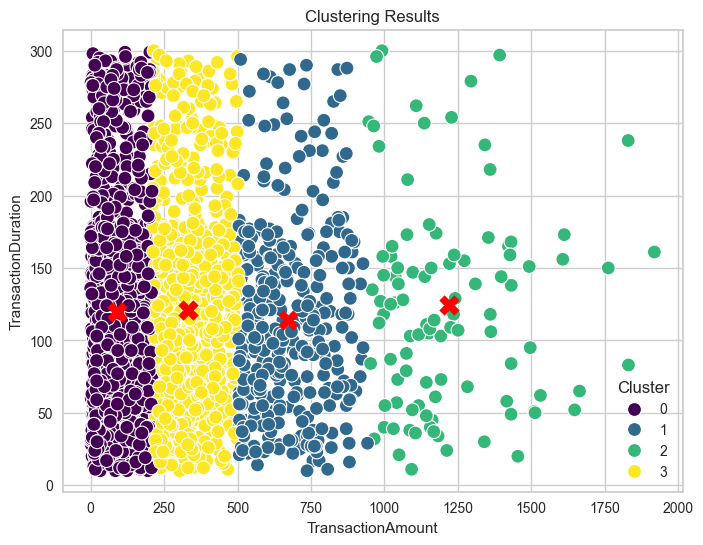

In [93]:
# Membuat visualisasi hasil clustering

data = X.dropna()
kmeans = KMeans(n_clusters=4)
data['Cluster'] = kmeans.fit_predict(data[['TransactionAmount', 'TransactionDuration']])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TransactionAmount', y='TransactionDuration', hue='Cluster', data=data, palette='viridis', s=100, marker='o')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')

plt.title('Clustering Results')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

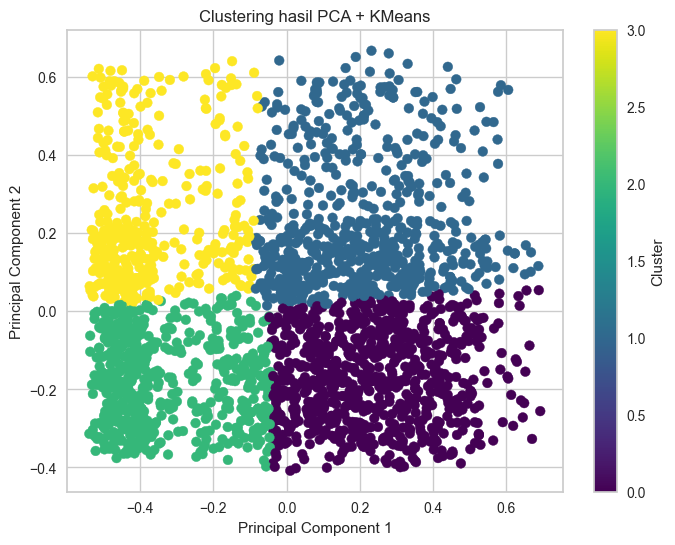

In [104]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering hasil PCA + KMeans')
plt.colorbar(label='Cluster')
plt.show()

In [95]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [96]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

df_numeric = df_cleanedd.select_dtypes(include=['int64', 'float64'])
numeric_summary = df_numeric.groupby(df_cleanedd['cluster']).agg(['mean', 'min', 'max', 'median', 'std', 'count'])
print("Analisis Deskriptif Numerik:\n")
print(numeric_summary)

df_categorical = df_cleanedd.select_dtypes(include=['object', 'category'])

categorical_summary = df_categorical.groupby(df_cleanedd['cluster']).agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
print("\nModus Fitur Kategorikal:\n")
print(categorical_summary)

Analisis Deskriptif Numerik:

        TransactionAmount                                            \
                     mean   min      max   median         std count   
cluster                                                               
0              287.439599  0.32  1512.99  212.740  267.366242   549   
1              313.580707  0.26  1830.00  223.535  310.387289  1018   
2              281.915745  1.82  1612.37  206.460  272.044208   611   
3              291.545413  1.14  1919.11  178.230  304.059647   242   

        CustomerAge                     ... LoginAttempts                   \
               mean   min   max median  ...           max median       std   
cluster                                 ...                                  
0         48.408015  18.0  80.0   49.0  ...           5.0    1.0  0.568813   
1         36.106090  18.0  80.0   27.0  ...           5.0    1.0  0.574798   
2         53.134206  18.0  80.0   54.0  ...           5.0    1.0  0.600926   
3   

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

1. **Cluster 0: (Nasabah Usia Menengah dengan Saldo Tinggi dan Transaksi Debit di New York Branch)**  
   - **Rata-rata (mean) TransactionAmount:** 287.44  
   - **Rata-rata (mean) CustomerAge:** 48.41 tahun  
   - **Rata-rata (mean) AccountBalance:** 8,359.64  
   - **Modus TransactionType:** Debit  
   - **Modus Location:** New York  
   - **Modus Channel:** Branch  
   - **Modus CustomerOccupation:** Engineer  
   - **Analisis:**  
     Cluster ini terdiri dari nasabah berusia menengah yang umumnya berprofesi sebagai engineer. Mereka melakukan transaksi debit dengan nominal sedang hingga besar dan memiliki saldo akun yang relatif tinggi. Transaksi mayoritas terjadi melalui cabang di New York. Kelompok ini cenderung stabil dan memiliki daya beli yang baik, sehingga cocok untuk produk tabungan dan investasi jangka panjang.

2. **Cluster 1: (Nasabah Muda dengan Saldo Rendah dan Transaksi Debit via ATM di Los Angeles)**  
   - **Rata-rata (mean) TransactionAmount:** 313.58  
   - **Rata-rata (mean) CustomerAge:** 36.11 tahun  
   - **Rata-rata (mean) AccountBalance:** 1,371.80  
   - **Modus TransactionType:** Debit  
   - **Modus Location:** Los Angeles  
   - **Modus Channel:** ATM  
   - **Modus CustomerOccupation:** Student  
   - **Analisis:**  
     Nasabah pada cluster ini cenderung lebih muda dan sebagian besar adalah mahasiswa. Mereka melakukan transaksi debit dengan nominal sedang hingga besar, tetapi saldo akun mereka tergolong rendah. Transaksi lebih banyak dilakukan melalui ATM di Los Angeles. Potensi strategi pemasaran adalah menawarkan produk tabungan yang fleksibel dan layanan digital yang mudah diakses.

3. **Cluster 2: (Nasabah Senior dengan Saldo Menengah dan Transaksi Debit Online di Columbus)**  
   - **Rata-rata (mean) TransactionAmount:** 281.92  
   - **Rata-rata (mean) CustomerAge:** 53.13 tahun  
   - **Rata-rata (mean) AccountBalance:** 5,257.26  
   - **Modus TransactionType:** Debit  
   - **Modus Location:** Columbus  
   - **Modus Channel:** Online  
   - **Modus CustomerOccupation:** Retired  
   - **Analisis:**  
     Cluster ini merupakan nasabah senior, kebanyakan pensiunan, yang melakukan transaksi debit dengan nominal sedang. Mereka memiliki saldo akun yang menengah dan cenderung melakukan transaksi secara online. Rekomendasi produk yang cocok adalah layanan perbankan digital dengan fitur keamanan yang tinggi dan produk investasi yang aman untuk pensiunan.

4. **Cluster 3: (Nasabah Paruh Baya dengan Saldo Sangat Tinggi dan Transaksi Debit di Memphis Branch)**  
   - **Rata-rata (mean) TransactionAmount:** 291.55  
   - **Rata-rata (mean) CustomerAge:** 50.79 tahun  
   - **Rata-rata (mean) AccountBalance:** 12,858.35  
   - **Modus TransactionType:** Debit  
   - **Modus Location:** Memphis  
   - **Modus Channel:** Branch  
   - **Modus CustomerOccupation:** Doctor  
   - **Analisis:**  
     Nasabah di cluster ini berusia paruh baya dengan profesi dokter, memiliki saldo akun yang sangat tinggi, dan melakukan transaksi debit melalui cabang di Memphis. Mereka menunjukkan pola transaksi nominal sedang dengan durasi transaksi sedang. Cluster ini sangat potensial untuk produk perbankan premium dan layanan wealth management.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [97]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_cleanedd = df_cleanedd.rename(columns={'cluster': 'Target'})

In [98]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_cleanedd.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [99]:
# inverse dataset ke rentang normal
scaler = MinMaxScaler()
df_scaled_array = scaler.fit_transform(df_numeric)

df_scaled = pd.DataFrame(df_scaled_array, columns=df_numeric.columns)
print("Data setelah scaling:\n", df_scaled)

df_inverse = scaler.inverse_transform(df_scaled)
df_inverse_df = pd.DataFrame(df_inverse, columns=df_numeric.columns)
print("\nData hasil inverse:\n", df_inverse_df)

Data setelah scaling:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              0.007207     0.838710             0.244828            0.0   
1              0.195940     0.806452             0.451724            0.0   
2              0.065680     0.016129             0.158621            0.0   
3              0.096016     0.129032             0.051724            0.0   
4              0.047888     0.000000             0.558621            0.0   
...                 ...          ...                  ...            ...   
2415           0.119770     0.983871             0.393103            0.0   
2416           0.292529     0.758065             0.044828            0.0   
2417           0.256847     0.564516             0.779310            0.0   
2418           0.103374     0.145161             0.255172            0.0   
2419           0.003768     0.758065             0.917241            0.0   

      AccountBalance  
0           0.336832  
1           0.9180

In [100]:
df_before = X.copy()
df_before['cluster'] = kmeans.labels_

df_after = pd.DataFrame(df_inverse, columns=df_numeric.columns)
df_after['cluster'] = kmeans.labels_


summary_before = df_before.groupby('cluster').agg(['mean', 'min', 'max', 'std'])
summary_after = df_after.groupby('cluster').agg(['mean', 'min', 'max', 'std'])

print("Statistik Cluster Sebelum Scaling (Data Asli)\n")
print(summary_before)

print("\nStatistik Cluster Setelah Inverse Scaling")
print(summary_after)

Statistik Cluster Sebelum Scaling (Data Asli)

        TransactionAmount                            CustomerAge              \
                     mean   min      max         std        mean   min   max   
cluster                                                                        
0              291.250938  0.84  1831.02  276.413439   57.727160  27.0  80.0   
1              282.744659  0.32  1919.11  286.833925   53.687405  26.0  80.0   
2              310.557540  2.03  1664.33  302.142931   28.521968  18.0  55.0   
3              316.452304  0.26  1762.28  310.971154   25.447644  18.0  49.0   

                   TransactionDuration                          LoginAttempts  \
               std                mean    min    max        std          mean   
cluster                                                                         
0        12.561281           72.271605   10.0  143.0  33.454289      1.103704   
1        12.751280          184.576631  111.0  300.0  48.189231     

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

1. **Cluster 0:**
   - **TransactionAmount:**  
     - Sebelum inverse: mean sekitar 291.25, rentang 0.84 – 1831.02  
     - Setelah inverse: mean tetap 291.25, rentang tetap 0.84 – 1831.02  
     - **Analisis:** Nilai mean dan rentang tetap sama karena inverse scaling mengembalikan data ke skala asli, menunjukkan transaksi dalam jumlah sedang hingga besar.
   - **CustomerAge:**  
     - Sebelum inverse: mean 57.73 tahun, rentang 27 – 80  
     - Setelah inverse: sama, karena ini data asli  
     - **Analisis:** Cluster ini didominasi pelanggan usia menengah hingga tua.
   - **TransactionDuration:**  
     - Sebelum inverse: mean 72.27 menit, rentang 10 – 143  
     - Setelah inverse: sama  
     - **Analisis:** Durasi transaksi tergolong sedang, tidak terlalu singkat maupun lama.
   - **LoginAttempts:**  
     - Sebelum inverse: mean sekitar 1.10, rentang 1 – 5  
     - Setelah inverse: sama  
     - **Analisis:** Pelanggan dalam cluster ini melakukan login dengan tingkat keberhasilan yang cukup baik.
   - **AccountBalance:**  
     - Sebelum inverse: mean 6806.83, rentang 201.04 – 14977.99  
     - Setelah inverse: sama  
     - **Analisis:** Saldo akun tergolong tinggi, menunjukkan pelanggan dengan kapasitas finansial besar.
   - **Analisis Cluster 0:**
     - Cluster 0 adalah pelanggan dewasa hingga senior dengan saldo cukup besar dan pola transaksi yang variatif. Mereka tampaknya adalah pelanggan setia dengan aktivitas login yang lancar.

2. **Cluster 1:**
   - **TransactionAmount:**  
     - Sebelum inverse: mean 282.74, rentang 0.32 – 1919.11  
     - Setelah inverse: tetap sama  
     - **Analisis:** Transaksi dengan nilai menengah, mirip Cluster 0 tapi dengan variasi rentang yang lebih besar.
   - **CustomerAge:**  
     - Sebelum inverse: mean 53.69 tahun, rentang 26 – 80  
     - Setelah inverse: sama  
     - **Analisis:** Umur pelanggan sedikit lebih muda dibanding Cluster 0.
   - **TransactionDuration:**  
     - Sebelum inverse: mean 184.58 menit, rentang 111 – 300  
     - Setelah inverse: sama  
     - **Analisis:** Transaksi berlangsung lebih lama, mungkin prosesnya lebih kompleks.
   - **LoginAttempts:**  
     - Sebelum inverse: mean 1.16, rentang 1 – 5  
     - Setelah inverse: sama  
     - **Analisis:** Aktivitas login stabil dengan sedikit kegagalan.
   - **AccountBalance:**  
     - Sebelum inverse: mean 7118.36, rentang 120.89 – 14942.78  
     - Setelah inverse: sama  
     - **Analisis:** Saldo rata-rata lebih tinggi dibanding Cluster 0.
   - **Analisis Cluster 1:**
     - Cluster 1 adalah pelanggan dewasa dengan saldo tertinggi, melakukan transaksi yang cenderung lama dan lebih kompleks, namun tetap dengan aktivitas login yang efisien. Bisa jadi pelanggan yang melakukan pembelian besar dengan proses yang lebih detail.

3. **Cluster 2:**
   - **TransactionAmount:**  
     - Sebelum inverse: mean 310.56, rentang 2.03 – 1664.33  
     - Setelah inverse: sama  
     - **Analisis:** Transaksi bernilai sedang, cenderung lebih tinggi daripada cluster sebelumnya.
   - **CustomerAge:**  
     - Sebelum inverse: mean 28.52 tahun, rentang 18 – 55  
     - Setelah inverse: sama  
     - **Analisis:** Cluster ini didominasi pelanggan muda.
   - **TransactionDuration:**  
     - Sebelum inverse: mean 65.61 menit, rentang 10 – 138  
     - Setelah inverse: sama  
     - **Analisis:** Durasi transaksi cenderung lebih pendek.
   - **LoginAttempts:**  
     - Sebelum inverse: mean 1.09, rentang 1 – 5  
     - Setelah inverse: sama  
     - **Analisis:** Login lancar tanpa banyak percobaan.
   - **AccountBalance:**  
     - Sebelum inverse: mean 2328.80, rentang 101.25 – 9963.39  
     - Setelah inverse: sama  
     - **Analisis:** Saldo akun lebih rendah dibanding cluster usia tua.
   - **Analisis Cluster 2:**
     - Cluster 2 adalah pelanggan muda dengan saldo sedang ke rendah, melakukan transaksi dengan nilai cukup besar namun cepat, dan sangat lancar dalam login. Ini bisa jadi kelompok pelanggan muda aktif dengan budget terbatas tapi efisien.

4. **Cluster 3:**
   - **TransactionAmount:**  
     - Sebelum inverse: mean 316.45, rentang 0.26 – 1762.28  
     - Setelah inverse: sama  
     - **Analisis:** Transaksi bernilai sedang hingga cukup besar.
   - **CustomerAge:**  
     - Sebelum inverse: mean 25.45 tahun, rentang 18 – 49  
     - Setelah inverse: sama  
     - **Analisis:** Cluster dengan usia pelanggan termuda.
   - **TransactionDuration:**  
     - Sebelum inverse: mean 186.81 menit, rentang 122 – 300  
     - Setelah inverse: sama  
     - **Analisis:** Transaksi paling lama dibanding cluster lain, mungkin proses lebih rumit.
   - **LoginAttempts:**  
     - Sebelum inverse: mean 1.13, rentang 1 – 5  
     - Setelah inverse: sama  
     - **Analisis:** Aktivitas login cukup stabil.
   - **AccountBalance:**  
     - Sebelum inverse: mean 2042.45, rentang 106.86 – 9716.68  
     - Setelah inverse: sama  
     - **Analisis:** Saldo relatif rendah sampai sedang, sesuai dengan usia muda cluster ini.
   - **Analisis Cluster 3:**
     - Cluster 3 adalah pelanggan muda dengan saldo rendah, yang melakukan transaksi bernilai sedang hingga besar tapi dengan durasi transaksi yang sangat lama. Mungkin mereka masih belajar menggunakan sistem atau melakukan transaksi yang lebih kompleks.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
# Reset index supaya align saat concat

valid_index = df_inverse_df.index
df_non_numeric_filtered = df_non_numeric.loc[valid_index].reset_index(drop=True)
df_inverse_df = df_inverse_df.reset_index(drop=True)
df_cluster = df_cluster.reset_index(drop=True)
df_finale = pd.concat([df_non_numeric_filtered, df_inverse_df, df_cluster], axis=1)

print(df_finale)

     TransactionID AccountID      TransactionDate TransactionType  \
0         TX000001   AC00128  2023-04-11 16:29:14           Debit   
1         TX000002   AC00455  2023-06-27 16:44:19           Debit   
2         TX000003   AC00019  2023-07-10 18:16:08           Debit   
3         TX000004   AC00070  2023-05-05 16:32:11           Debit   
4         TX000005   AC00411  2023-10-16 17:51:24          Credit   
...            ...       ...                  ...             ...   
2415      TX002416   AC00459  2023-02-13 16:03:33          Credit   
2416      TX002417   AC00069  2023-12-05 16:04:34           Debit   
2417      TX002418   AC00046  2023-10-03 16:39:18           Debit   
2418      TX002419   AC00067  2023-03-17 17:03:03           Debit   
2419      TX002420   AC00257  2023-08-17 17:10:25           Debit   

         Location DeviceID      IP Address MerchantID Channel  \
0       San Diego  D000380  162.198.218.92       M015     ATM   
1         Houston  D000051     13.149.61.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_finale.to_csv('data_clustering_inverse.csv', index=False)